## NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases)

- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically *predict whether or not a patient has diabetes*, based on certain diagnostic measurements included in the dataset. 
- Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are **Females at least 21 years old** of Pima Indian heritage.


- Berfore we start lets import all the required libraries ,going forward we will import the libraries according to the need.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- we dont have any missing values in the given data , but all the values in the coloumn with the value as "0" are described as **NULL** values only.
- so we find all the **zeros** and treat them accordingly.


In [5]:
(df == 0).sum() 

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# EDA
### Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below
- Glucose
- BloodPressure(mm Hg)
- SkinThickness(mm)
- Insulin(mu U/ml)
- BMI(weight in kg/(height in m)^2)
### value of zero does not make sense and thus indicates missing value
- So we treat the all the values of zeros , as most of the are continous variabels we try and replce with the **MEAN** or **MEDIAN** 
- OUTCOME varible is not changed as the it indicates "yes" or "no"

In [6]:
df["Pregnancies"]=df["Pregnancies"].replace(0,df["Pregnancies"].mean())
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())

In [7]:
(df==0).sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
df_data=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].describe()

In [9]:
df_data.drop(["count"],axis=0)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
mean,121.681605,72.254807,26.606479,118.660163,32.450805
std,30.436016,12.115932,9.631241,93.080358,6.875374
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,20.536458,79.799479,27.500000
50%,117.000000,72.000000,23.000000,79.799479,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


- As per the statstics if the bloodsuger level are >120 then it considerd to diabetic(though it depends on the pre and post meal test we taken 120 as the mark ). 
- The average **Glucose** levels are considerd to be 120, by which may conculde that higer *%* of the patinets in the dataset are not diabetic.
- maximun and minumun Glucose levels stands at "44" and "199".
- The average **BloodPressure** also looks like normal at "72",with higest as "122" and lowest as "24".
- **SkinThickness** is at maximum of "99" and at a minumum of "7".
- **Insulin** is at highest rate of 846(mu U/ml) and lowest of 14(mu U/ml).
- **BMI(Body Mass is index)** at maximum of 67 and minimum of 18

# Visually explore these variables using histograms.

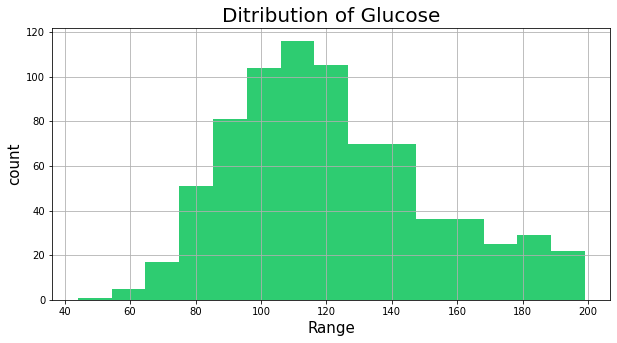

In [10]:
plt.figure(figsize=(10,5))
plt.hist(df["Glucose"],bins=15,color="#2ECC71")
plt.title("Ditribution of Glucose",fontsize="20")
plt.xlabel("Range",fontsize="15")
plt.ylabel("count",fontsize="15")
plt.grid()
plt.show()

- maximum amount if the population in the data is distrubuted aroung 70 and 170

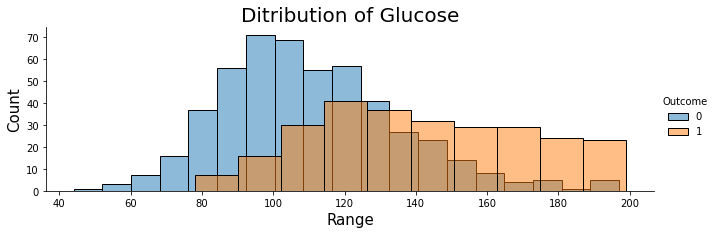

In [11]:
fig=sns.FacetGrid(data=df,hue="Outcome",aspect=3)
fig.map(sns.histplot,"Glucose",alpha=0.5) # alpha= opacity
fig.add_legend()
plt.title("Ditribution of Glucose",fontsize="20")
plt.xlabel("Range",fontsize="15")
plt.ylabel("Count",fontsize="15")
plt.show()

-from the above observation we can find thte most of population who are diabetic are >120

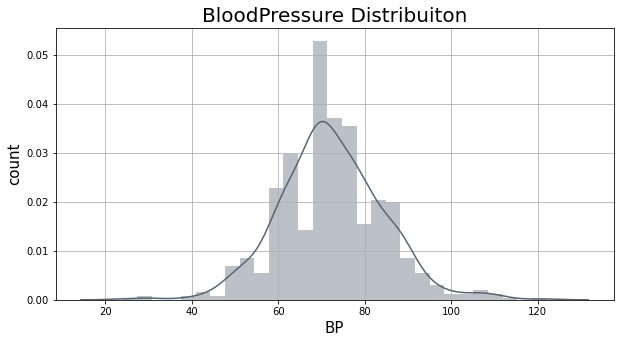

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(df["BloodPressure"],hist=True,color="#566573")
plt.ylabel("count" ,fontsize="15")
plt.xlabel("BP", fontsize="15")
plt.title("BloodPressure Distribuiton",fontsize="20")
plt.grid()
plt.show()

- maximum population lies at the range of 50-100 and around 70 being the maximum

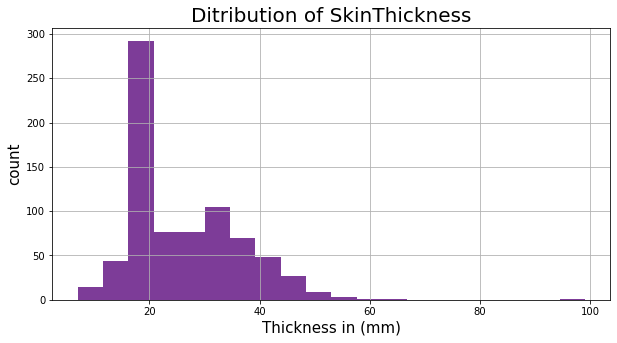

In [13]:
plt.figure(figsize=(10,5))
plt.hist(df["SkinThickness"],bins=20,color="#7D3C98")
plt.title("Ditribution of SkinThickness",fontsize="20")
plt.xlabel("Thickness in (mm)",fontsize="15")
plt.ylabel("count",fontsize="15")
plt.grid()
plt.show()

- population aroud the thickness from 10 to 50 are more and more population being at the 15 to 20

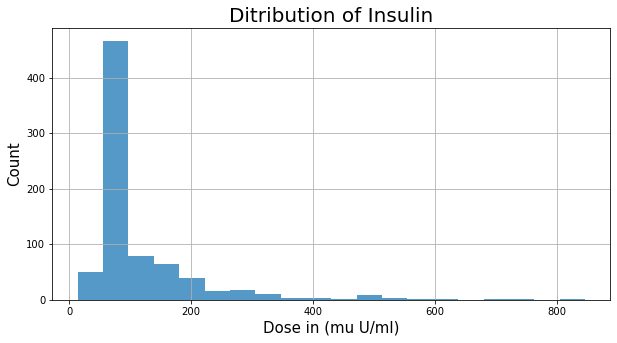

In [14]:
plt.figure(figsize=(10,5))
plt.hist(df["Insulin"],bins=20,color="#5499C7")
plt.title("Ditribution of Insulin",fontsize="20")
plt.xlabel("Dose in (mu U/ml)",fontsize="15")
plt.ylabel("Count",fontsize="15")
plt.grid()
plt.show()

- maxumim population in the data set take the dose between 50 to 200 , we can assume that from the distribution 

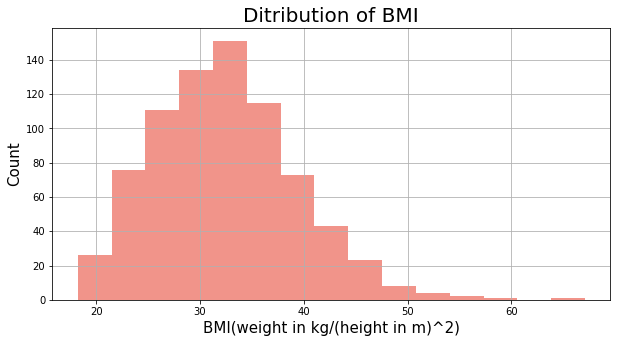

In [15]:
plt.figure(figsize=(10,5))
plt.hist(df["BMI"],bins=15,color="#F1948A")
plt.title("Ditribution of BMI",fontsize="20")
plt.xlabel("BMI(weight in kg/(height in m)^2)",fontsize="15")
plt.ylabel("Count",fontsize="15")
plt.grid()
plt.show()

- Majority of the population lies with the BMI of 20 to 50 , later the graphs dont show any signs

## To understand over all data we can do the pairplot 

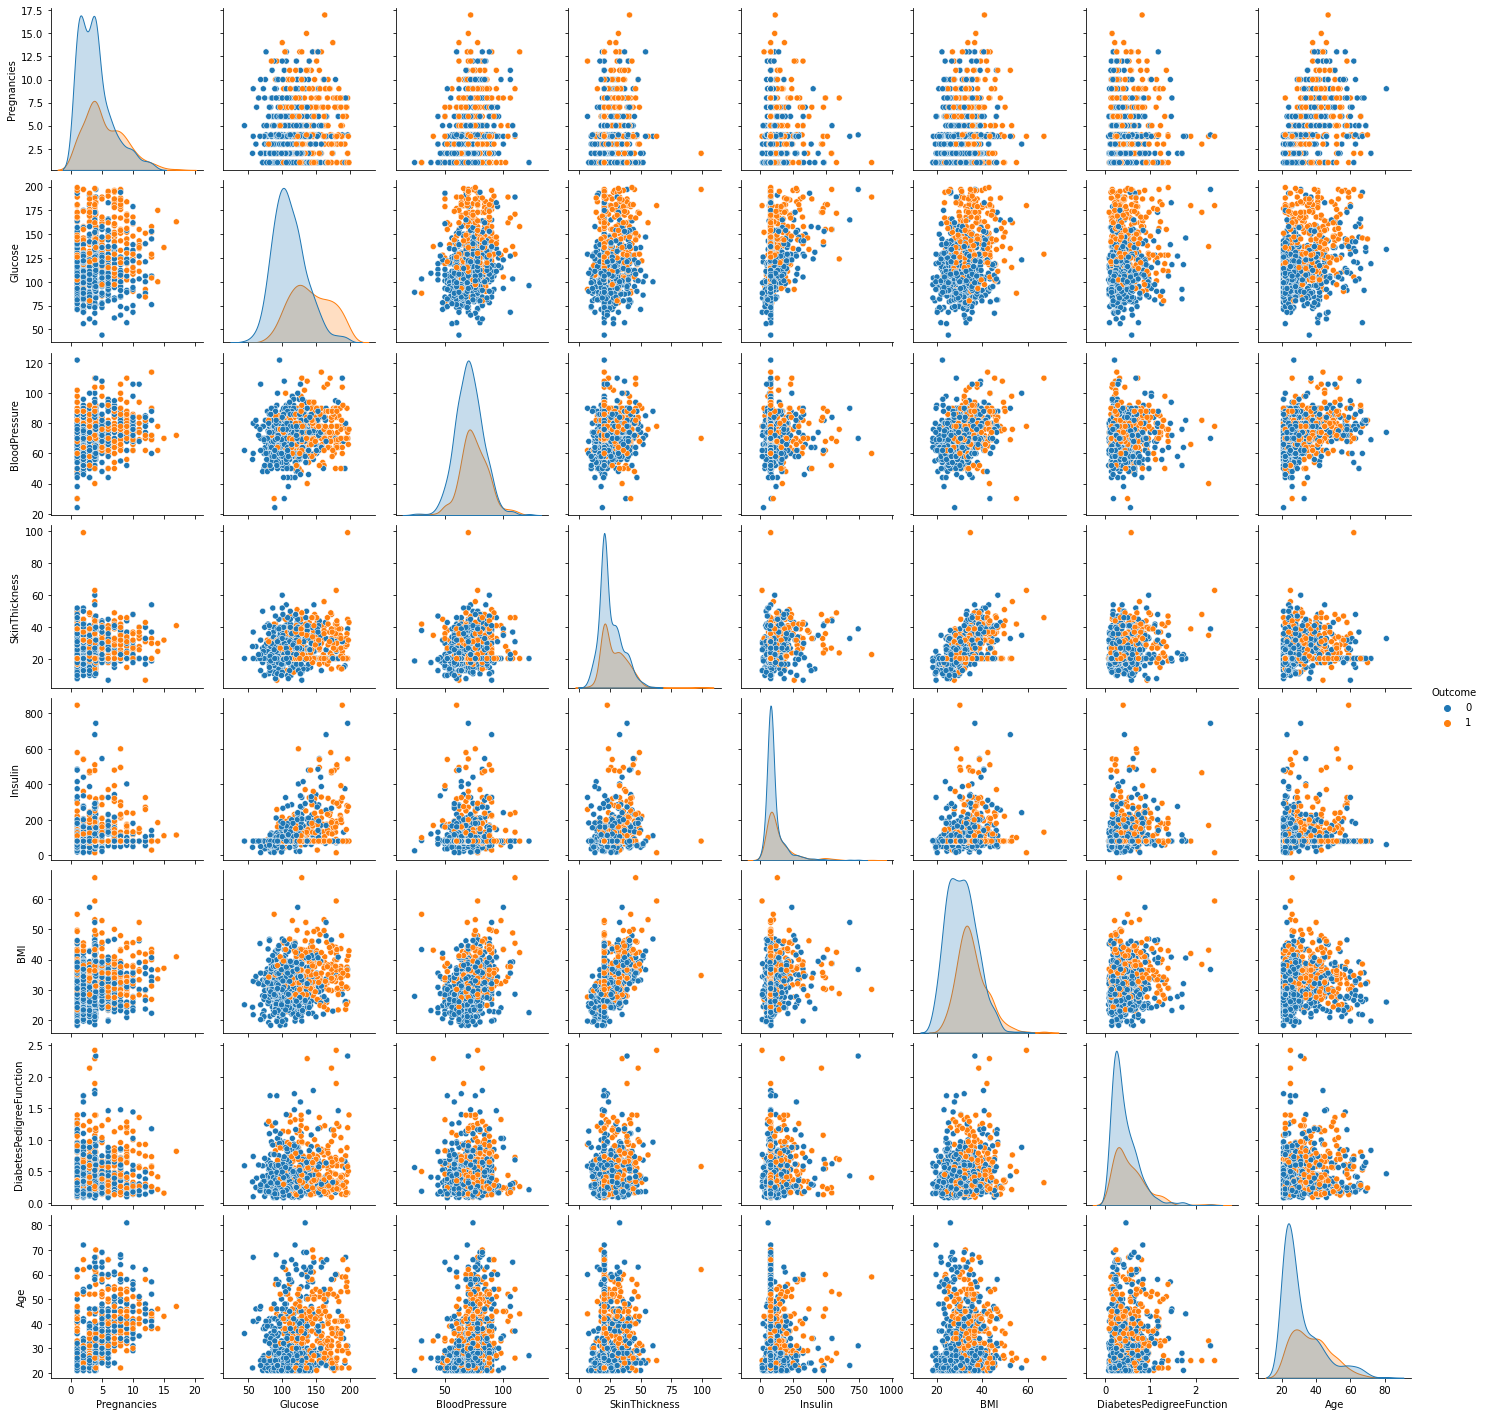

In [16]:

sns.pairplot(data=df,hue="Outcome",palette="tab10")

# There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [17]:
df_dtypes=df.dtypes.value_counts()
df_dtypes

float64    7
int64      2
dtype: int64

<AxesSubplot:>

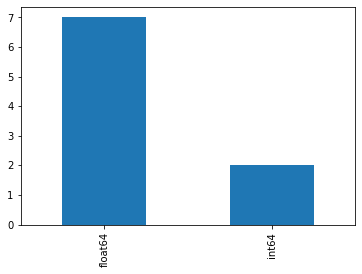

In [18]:
df_dtypes.plot(kind="bar")

- There are 7 values with the *floatdatatypes* and 2 with *integer*

 ## Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [19]:
outcome_bal=(df["Outcome"].value_counts()/len(df["Outcome"]))*100

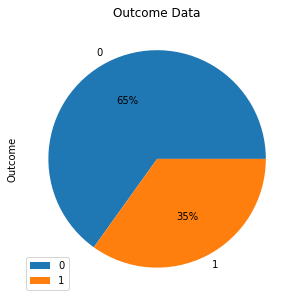

In [20]:
outcome_bal=df["Outcome"].value_counts(normalize=True)
outcome_bal.plot(kind="pie",figsize=(10,5),autopct="%1.0f%%")
plt.title("Outcome Data")
plt.legend()


### Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

- Scatter plots kind of gives us an idea how the variabels are related to eachother , as our goal is to find the 
if the patient is diabetic or not lets see some graphical representations 

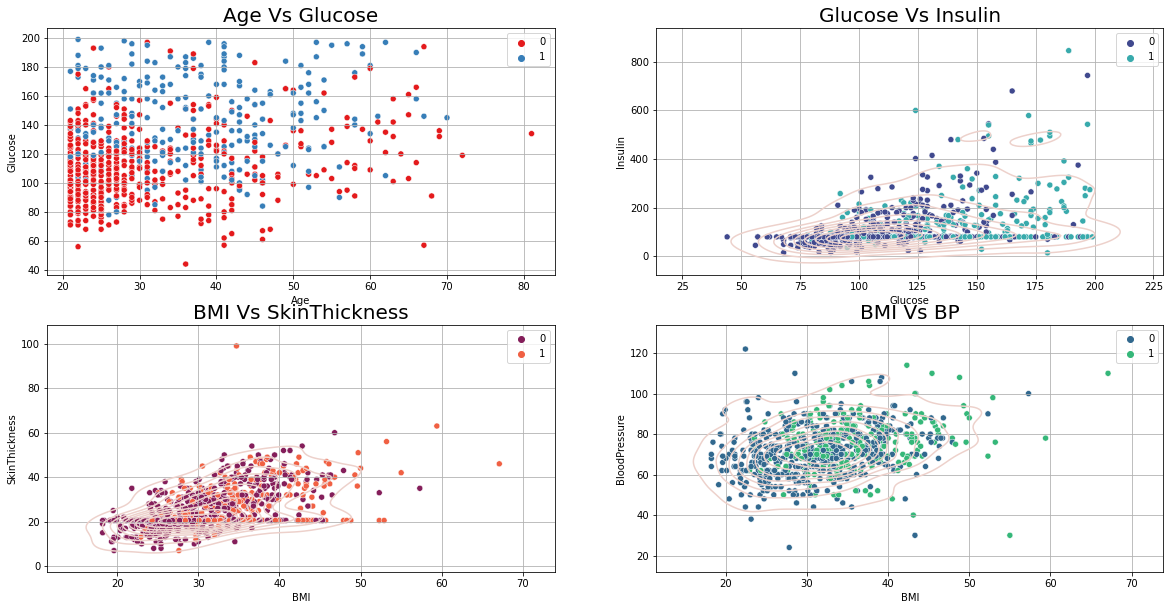

In [21]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.scatterplot(df["Age"],df["Glucose"],hue=df["Outcome"] ,palette="Set1") 
plt.title("Age Vs Glucose",fontsize="20")
plt.grid()
plt.legend()

plt.subplot(2,2,2)
sns.scatterplot(df["Glucose"],df["Insulin"],hue=df["Outcome"] ,palette="mako") 
sns.kdeplot(df["Glucose"],df["Insulin"],hue=0.8,color="blue")
plt.title("Glucose Vs Insulin",fontsize="20")
plt.grid()
plt.legend()

plt.subplot(2,2,3)
sns.scatterplot(df["BMI"],df["SkinThickness"],hue=df["Outcome"] ,palette="rocket") 
sns.kdeplot(df["BMI"],df["SkinThickness"],hue=0.8,color="blue")
plt.title("BMI Vs SkinThickness",fontsize="20")
plt.grid()
plt.legend()

plt.subplot(2,2,4)
sns.scatterplot(df["BMI"],df["BloodPressure"],hue=df["Outcome"] ,palette="viridis") 
sns.kdeplot(df["BMI"],df["BloodPressure"],hue=0.8,color="blue")
plt.title("BMI Vs BP",fontsize="20")
plt.legend()
plt.grid()

plt.show()




## Findings
- Glucose levels are increasing by age but there are less chances that Age<35 are at a normal Glucose level and less prone to be diabetic.
- The Glocose level are normal, if compared to insulin there is large number of population that falls in the region(75-120) and less prone to be diabetic, Glucose>125 are prone to be diabetic and most them are taking the insulin at 200(mu U/ml)
-BMI is one of the major factor and as the BMI is incresing the skinthickness is also increasing majority of the data is around 30 .
- Majority of the data is at an BMI of 20 to 50 with the BP ranginf from (40-100). amjoriy of the data is around the BMI of 30 and BP at 70 

# Perform correlation analysis. Visually explore it using a heat map.

In [22]:
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261,0.247971
Glucose,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.247971,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


### Regression plot 

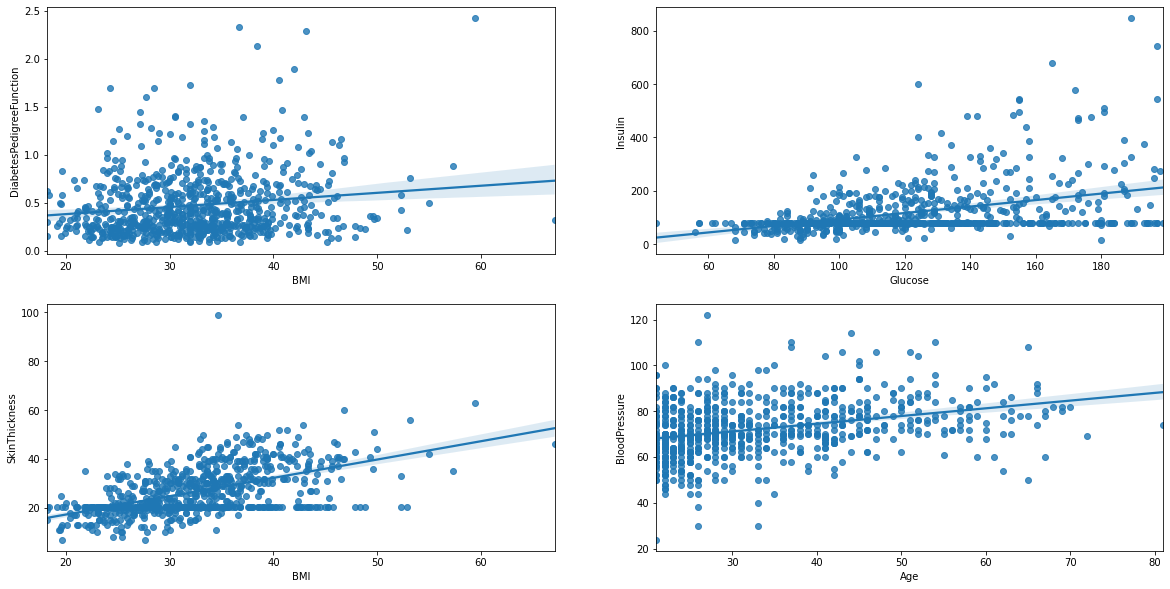

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.regplot(x="BMI", y="DiabetesPedigreeFunction",data=df);
plt.subplot(2,2,2)
sns.regplot(x="Glucose", y="Insulin",data=df);
plt.subplot(2,2,3)
sns.regplot(x="BMI", y="SkinThickness",data=df);
plt.subplot(2,2,4)
sns.regplot(x="Age", y="BloodPressure",data=df);
plt.show()

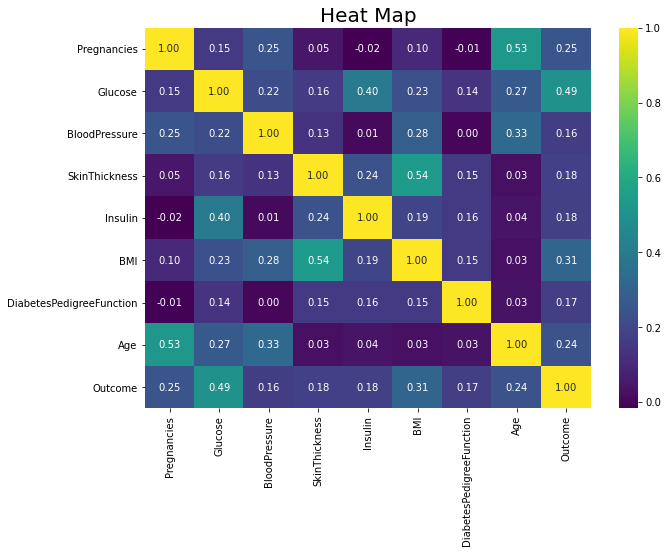

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap="viridis",annot=True,fmt=".2f")
plt.title("Heat Map",fontsize="20")
plt.show()


# Before we start building the model it is very importent to complete few things as this may affect the model .
- Outliers 
- Standardization of the data
- Feature Engineering

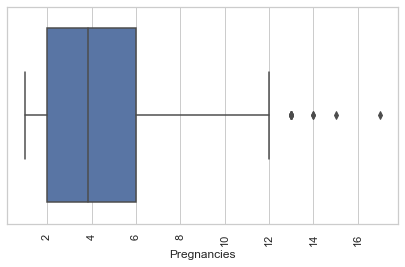

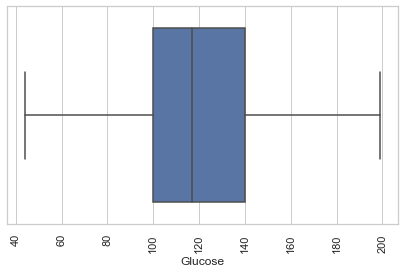

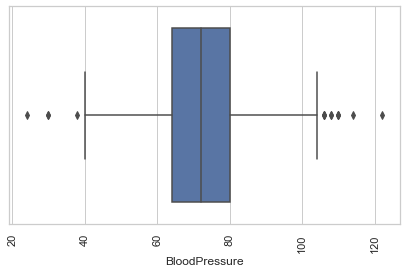

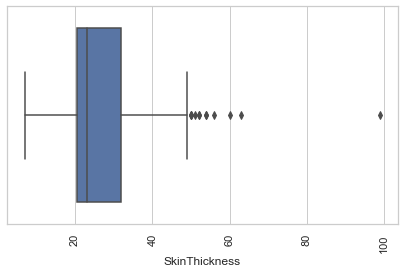

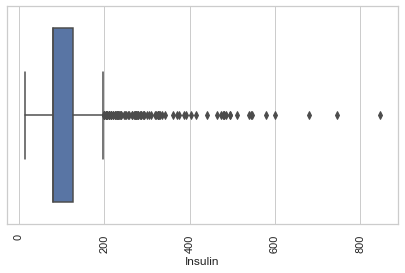

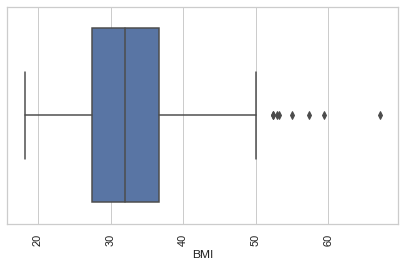

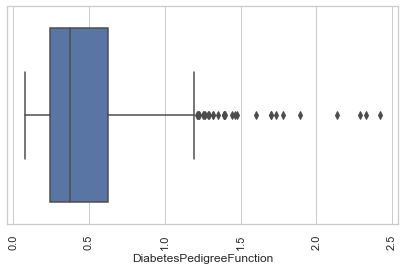

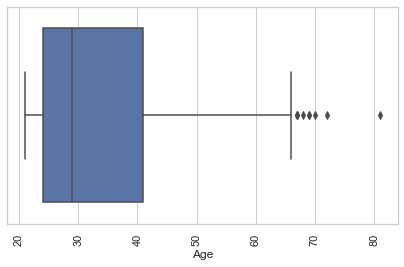

In [25]:
df_fet=df.drop(["Outcome"],axis=1)
for feature in df_fet:
    plt.figure(figsize=(7,4))
    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(df[feature])
    plt.xticks(rotation=90)
    plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
y= df['Outcome']
X = df.drop('Outcome', axis=1)

In [28]:
X.shape, y.shape

((768, 8), (768,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

In [30]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


## Standardization of the data 
-  standardization of the data is a method to standardise the data that we have into a standard scale there are different methods of standardization .
	- standard scalar 
	- Min Max scalar
	-  Robust scalar 

- standard scalar method assumes that our data is normally distributed in standardize the scale of each feature.

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)


## Applying PCA

- **Feature Engineering** is  the method to determine the number of features that are significant  and affecting our outcome.
- It is used to reduce the number of features depending upon their effectiveness that they show on our target variable there are different types of future engineering techniques **Principal Component Analysis** is one of them .

In [32]:
from sklearn.decomposition import PCA
pc = PCA(n_components=len(X.columns))
X_train_pc=pc.fit_transform(X_train_sc)
PC_df_train=pd.DataFrame(X_train_pc,columns=['PC_' +str(i) for i in range(1,pc.n_components_+1)])
PC_df_train

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
0,-0.088368,0.128474,0.031175,-0.574837,0.375142,-1.172466,-0.472217,0.393175
1,-0.380491,1.073609,0.265367,-0.119130,-0.471502,0.346816,-0.264915,-0.505785
2,-0.048184,0.371302,0.018872,-0.790662,-0.713569,0.063142,0.142027,0.236186
3,0.932047,-2.558363,1.293216,-0.125913,-0.000958,-0.524831,1.483351,0.528628
4,0.923292,0.378009,-1.272596,1.271353,-0.180352,0.111623,-0.687904,0.270906
...,...,...,...,...,...,...,...,...
609,-0.856361,0.361999,-0.551831,0.314119,0.568423,0.107052,-0.637306,-0.241216
610,-0.438438,-2.049236,1.049611,-0.195694,-0.942354,-0.373166,1.082612,0.354831
611,0.158677,-0.792883,-0.558782,-0.562251,0.911555,-0.008071,-0.522183,0.114790
612,0.077788,-0.961782,0.824421,-0.048813,-0.287423,-1.173292,-0.243549,-0.279456


## PCA analysis 
- we can do this PC analysis by using graphical method so by visualising the data we will be able to understand how many features that we can select before building model, here we are going to use hey elbow method to find number of features 

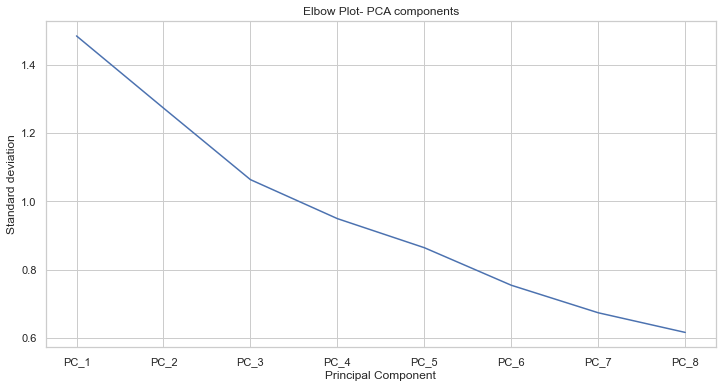

In [33]:
plt.figure(figsize=(12,6))
plt.plot(PC_df_train.std())
plt.title('Elbow Plot- PCA components')
plt.xlabel('Principal Component')
plt.ylabel('Standard deviation')
plt.show()

### We can clearly identify that proper elbow is not formed in the abovegraph, so we can select all the components to build the model .

# DATA MODELING


### Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.



Now that we've understood how the data is distributed now it's time for us to go ahead and create a model that is trained and that can predict the values on .

it's not always good to try with all the machine learning algorithms that we have .

At a point of time the data sets can be very large that we cant try and test this data set with all the machine learning algorithms and come out with what is the best accuracy model .

So it is very important for us to understand how we need to select a machine learning algorithm based on the data analysis that we have done and when we talk about data analysis pair plot is basically a most important plot that will explain us the entire data distribution .

Before we go ahead and select the right machine learning algorithm it's very important to understand what the problem statement is .

As per the given problem statement we are expected to predict whether a patient is a diabetic or a non diabetic so it is a classification problem .

When it comes to finding or predicting a model with classification algorithm there are different kinds of machine learning algorithms that we can try on :
- logistic regression 
- Decision tree 
- Random forest 
- XG boost 
- Know nearest Neighbour
- And Support vector machines  

As per the data distribution that we have seen from the pair plot we can understand that the outcomes of most of the variables are overlapped.

logistic regression draws a straight line which is called a best fit line that can differentiate the outcomes in a better way but in this problem statement as we've seen that the most of the variables are overlapped to each other we might not get the right accuracy in that model however we will still try and perform the logistic regression and find out the accuracy.

Decision tree , Random forest and XG boost are also one of the best machine learning algorithms that we can try on  ,Because these are the machine learning algorithms which are used when the data is not linearly Classified .

Whenever our data is overlapped **KNN** is  the best classification and will give us the best accuracy because KNN is best when it is used when the data is not linearly classified .

 ## Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.
 
 ## Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [34]:
print(PC_df_train.shape)
y_train.shape

(614, 8)


(614,)

In [35]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve

## Logistic Regression

Accuracy Score 
 71.42857142857143
              precision    recall  f1-score   support

           0       0.72      0.89      0.80        98
           1       0.68      0.41      0.51        56

    accuracy                           0.71       154
   macro avg       0.70      0.65      0.65       154
weighted avg       0.71      0.71      0.69       154



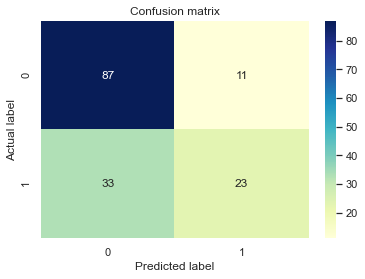

In [36]:
LR = LogisticRegression()
LR.fit(X_train_pc,y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_pred=LR.predict(X_test_pc)

## Model analaysis by confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##  Accuracy of the model :
print('Accuracy Score \n', accuracy_score(y_pred,y_test)*100)
## Classification report :
print(classification_report(y_test,y_pred))

![image](https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg)

- Sensitivity = TP/TP+FN
- Specificity = TN/TN+FP

# AUC(ROC) score and curve

-ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things . Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two
-AUC (Area Under Curve) is the probablity of the prediction our model can do ,if the area under the curve is more ,that means our model is the best model . AUC should be greater as much as possible 

In [38]:
roc_auc_score(y_test, y_pred)*100

64.92346938775509

In [39]:
y_pred_proba=LR.predict_proba(X_test_pc)

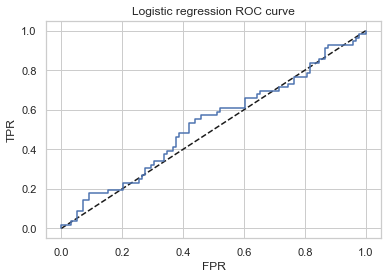

In [42]:
y_pred_proba = LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,) #label='LR')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Logistic regression ROC curve')
plt.show()

# Support Vector Machines 

Accuracy Score 
 72.07792207792207
              precision    recall  f1-score   support

           0       0.73      0.90      0.80        98
           1       0.70      0.41      0.52        56

    accuracy                           0.72       154
   macro avg       0.71      0.65      0.66       154
weighted avg       0.72      0.72      0.70       154



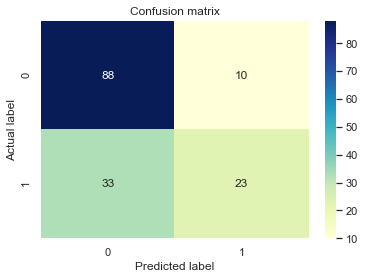

In [43]:
svc= SVC()
svc.fit(X_train_pc,y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_svc_pred=svc.predict(X_test_pc)

## Model analaysis by confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test,y_svc_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##  Accuracy of the model :
print('Accuracy Score \n', accuracy_score(y_svc_pred,y_test)*100)
## Classification report :
print(classification_report(y_test,y_svc_pred))



In [44]:
roc_auc_score(y_test, y_svc_pred)*100

65.43367346938776

# XGBOOST

[15:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score 
 70.77922077922078
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        98
           1       0.63      0.46      0.54        56

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



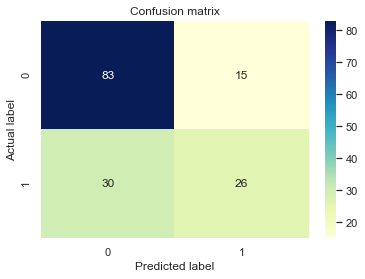

In [45]:
xgb= XGBClassifier()
xgb.fit(X_train_pc,y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_xgb_pred=xgb.predict(X_test_pc)

## Model analaysis by confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test,y_xgb_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##  Accuracy of the model :
print('Accuracy Score \n', accuracy_score(y_xgb_pred,y_test)*100)
## Classification report :
print(classification_report(y_test,y_xgb_pred))




In [46]:
roc_auc_score(y_test, y_xgb_pred)*100

65.56122448979592

In [47]:
y_xgb_pred_proba=xgb.predict_proba(X_test_pc)

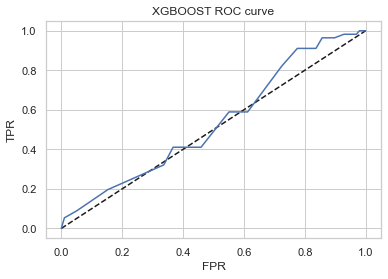

In [48]:
y_xgb_pred_proba = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_xgb_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,) #label='LR')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('XGBOOST ROC curve')
plt.show()

## KNN

Accuracy Score 
 69.48051948051948
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        98
           1       0.61      0.45      0.52        56

    accuracy                           0.69       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



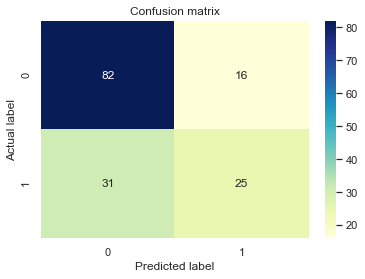

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train_pc,y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_knn_pred=knn.predict(X_test_pc)

## Model analaysis by confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test,y_knn_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##  Accuracy of the model :
print('Accuracy Score \n', accuracy_score(y_knn_pred,y_test)*100)
## Classification report :
print(classification_report(y_test,y_knn_pred))



In [45]:
roc_auc_score(y_test, y_knn_pred)*100

64.15816326530613

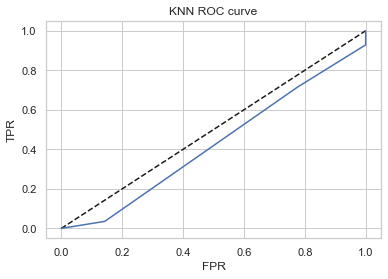

In [46]:
y_knn_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_knn_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,) #label='LR')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('KNN ROC curve')
plt.show()

### Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [49]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7500636618283677
Best Parameters: {'n_neighbors': 39}


- Comparison of all the diffrent models we have best accuracy from SVM with 72% 
- While in the hyperparameter tuning KNN gave us the best fit model with 75% 
- we can achieve best accuracy scores by using Modeltunining techniques as well.